In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
length = 2
angle = 45

nail_x = -0.2
nail_y = -1.5

g = 9.8

dt = 0.01
t_limit = 2

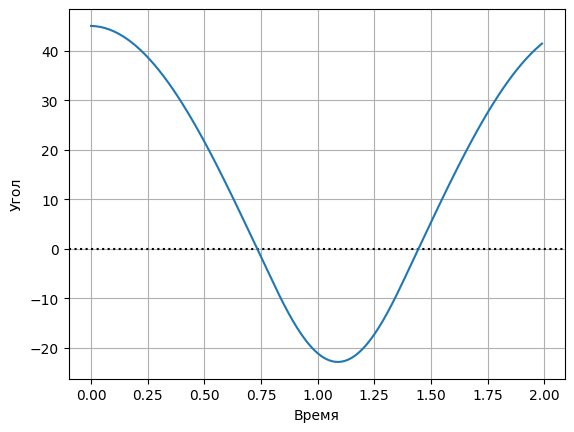

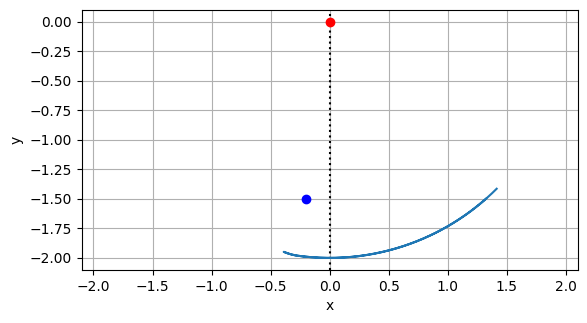

In [3]:
coef = 1 if nail_x > 0 else -1

theta = np.deg2rad(-coef * angle)
theta_d = 0
t = 0
length_nail = length - np.sqrt(nail_x**2 + nail_y**2)
angle_nail = np.arctan(nail_x / abs(nail_y))
is_nail = 0
r = length

theta_list = list()
x_list = list()
y_list = list()
t_list = [i * dt for i in range(int(t_limit / dt))]

while t < t_limit:
    theta_list.append(theta)

    if is_nail and theta * coef < angle_nail * coef:  # вышли
        r = length
        is_nail = 0

    elif not is_nail and theta * coef >= angle_nail * coef:  # вошли
        r = length_nail
        is_nail = 1
    
    x_list.append(is_nail * nail_x + r * np.sin(theta))
    y_list.append(is_nail * nail_y - r * np.cos(theta))

    theta_dd = -g * np.sin(theta) / r
    theta_d += theta_dd * dt
    theta += theta_d * dt
    t += dt

theta_deg_list = np.rad2deg(np.array(theta_list))

plt.axhline(y=0, color='black', linestyle=':')
plt.plot(t_list, theta_deg_list)
plt.xlabel('Время')
plt.ylabel('Угол')
plt.grid()
plt.show()

plt.axvline(x=0, color='black', linestyle=':')
plt.plot(x_list, y_list)
plt.plot([0], [0], color='red', marker='o')
plt.plot([nail_x], [nail_y], color='blue', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.gca().set_aspect('equal')
plt.xlim(-length * 1.05, length * 1.05)
plt.show()